# PyTorch Workflow
6 Steps
1. Data (prepare and load)
2. Build model
3. Fitting model to data
4. Making predictions and eval (inference)
5. Saving and loading model
6. Putting it all together

In [5]:
import torch
from torch import nn # all of pytorch building blocks for a neural network
import matplotlib.pyplot as plt

torch.__version__

'2.1.2+cu121'

### 1. Data (prepare and load)

In [19]:
# create known parameters
weight = 0.9
bias = 0.2

# create 
start = 0
end = 1
step =0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.2000],
         [0.2180],
         [0.2360],
         [0.2540],
         [0.2720]]))

In [22]:
# Create train and test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [53]:
def plot_prediction(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_label=y_test,
                    predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(3, 3))
    plt.scatter(train_data, train_label, c='b', s=4, label='Training data')
    plt.scatter(test_data, test_label, c='g', s=4, label='Testing data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='b', s=4, label='Predictions')
    plt.legend(prop={'size':10})
    plt.show()

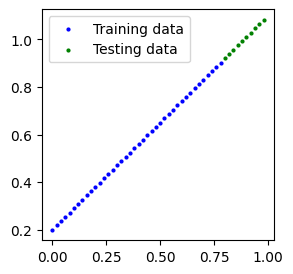

In [54]:
plot_prediction()

### 2. Build Model

In [51]:
# Create linear regression model

class LinearRegressionModel(nn.Module): # we inherit nn.Module = base class for all models in PyTorch
    def __init__(self):
        super.__init__() # track grad with require_grad
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float)) # not needed when copy from net
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float)) # not needed when copy from net

        # Forward Method to define computation in model
        def forward(self, x:torch.Tensor) -> torch.Tensor: # Operation what model does
            return self.weights * x + self.bias # Linear regression model  